<font size="+3"><strong>1. Exploring the Data</strong></font>

In this project, I am going to work with data from the [Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm) (SCF). The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years, and I wiill work with an extract of the results from 2019.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Read the file `"data/SCFP2019[1]"` into the DataFrame `df`.

In [3]:
df = pd.read_csv("data/SCFP2019[1].csv")
print("df shape:", df.shape)
df.head()

df shape: (28885, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


For this project, I am going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the "TURNFEAR" column.

In [4]:
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


## Explore

## Age

Create a list age_groups with the unique values in the "AGECL" column

In [5]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


Create a Series agecl that contains the observations from "AGECL" using the true group names.

In [6]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
age_cl.head()

5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

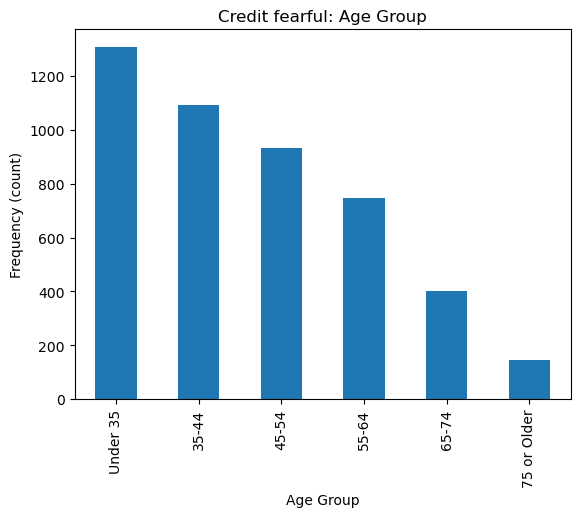

In [8]:
# Create a bar chart showing the value counts from age_cl

age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(
    kind = "bar",
    xlabel = "Age Group",
    ylabel = "Frequency (count)",
    title = "Credit fearful: Age Group"
);

 Our chart is telling us that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data.

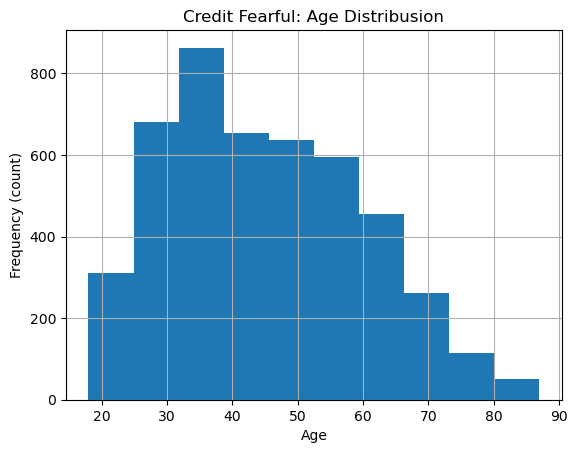

In [9]:
# Plot histogram of "AGE"

df_fear["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful: Age Distribusion");


It looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are most concerned seem to be between 30 and 40.

### Race

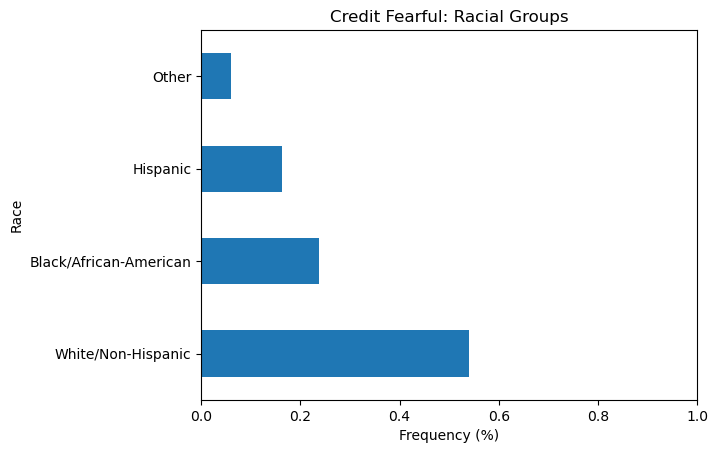

In [10]:
# Create a horizontal bar chart showing the normalized value counts for "RACE"

race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race=df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

This suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

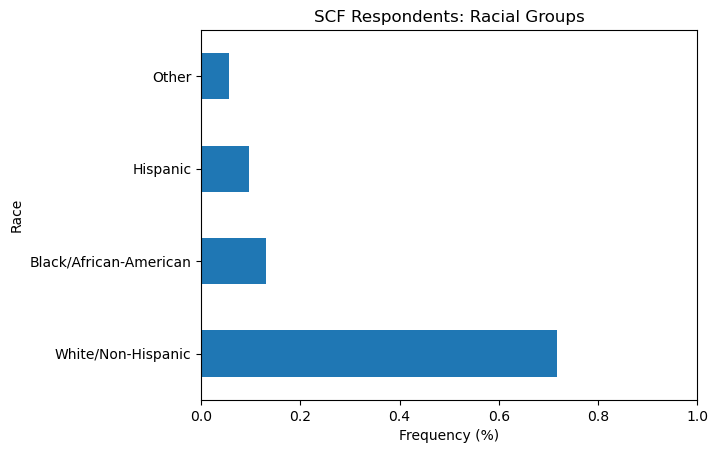

In [11]:
# Recreate the horizontal bar chart you just made, but this time use the entire dataset df instead of the subset df_fear
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");


How does this second bar chart change our perception of the first one? On the one hand, we can see that White Non-Hispanics account for around 70% of whole dataset, but only 54% of credit fearful respondents. On the other hand, Black and Hispanic respondents represent 23% of the whole dataset but 40% of credit fearful respondents. In other words, Black and Hispanic households are actually more likely to be in the credit fearful group.

### Income

Create a DataFrame df_inccat that shows the normalized frequency for income categories for both the credit fearful and non-credit fearful households in the dataset

In [12]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat =(
    
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


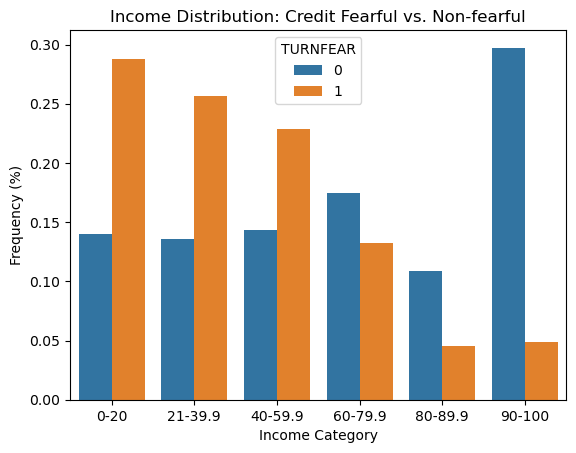

In [13]:
# Create bar chart of `df_inccat`
sns.barplot(
    x="INCCAT",
    y="frequency",
    hue="TURNFEAR",
    data=df_inccat,
    order=inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes. 

So, based on all this, what do we know? Among the people who responded that they were indeed worried about being approved for credit after having been denied in the past five years, a plurality of the young and low-income had the highest number of respondents. That makes sense, right? Young people tend to make less money and rely more heavily on credit to get their lives off the ground, so having been denied credit makes them more anxious about the future.

### Assets

In [14]:
# Calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole dataset df

asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544793152


That's a moderate positive correlation, which we would probably expect.For many Americans, the value of their primary residence makes up most of the value of their total assets.

In [15]:
# Calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole credit-fearful subset df_fear.

asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735998702


It's still only a moderate positive correlation, but the relationship between the total value of assets and the value of the primary residence is stronger for our TURNFEAR group than it is for the population as a whole.

In [17]:
# Make a correlation matrix using df, considering only the columns "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC".

cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [18]:
# Make a correlation matrix using df_fear.

corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


There are some pretty important differences here! The relationship between "DEBT" and "HOUSES" is positive for both datasets, but while the coefficient for df is fairly weak at 0.26, the same number for df_fear is 0.96.

### Education

In [19]:
#  Create a DataFrame df_educ
df_educ = df_educ=(
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


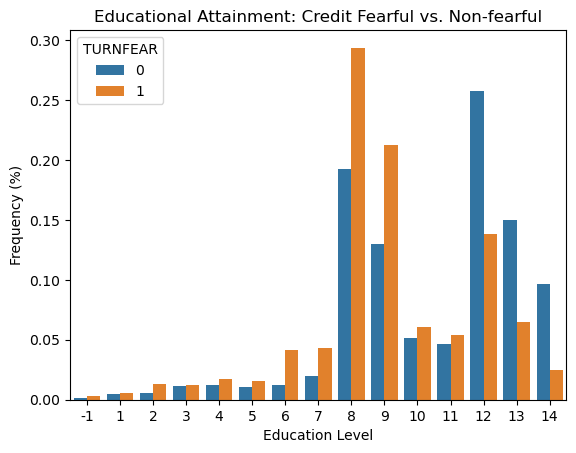

In [20]:
# Create bar chart of `df_educ`
sns.barplot(
    x="EDUC",
    y="frequency",
    hue="TURNFEAR",
    data=df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

we can see that a much higher proportion of credit-fearful respondents have only a high school diploma, while university degrees are more common among the non-credit fearful.

### Debt

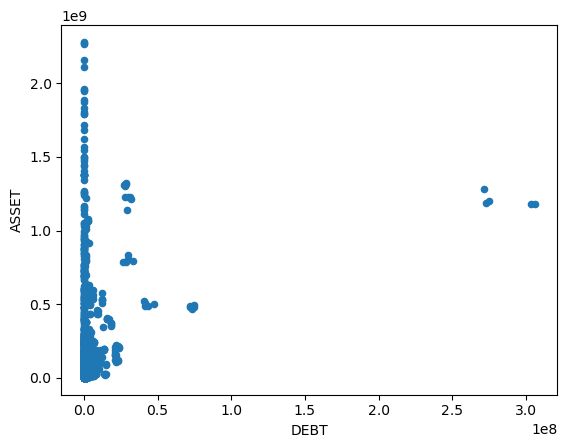

In [21]:
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x="DEBT", y="ASSET");

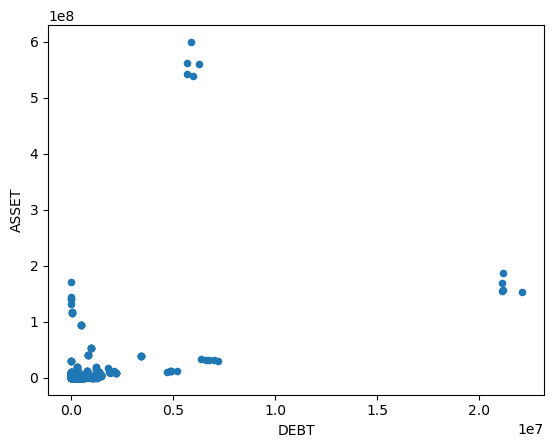

In [22]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y="ASSET");

You can see relationship in our df_fear graph is flatter than the one in our df graph, but they clearly are different.

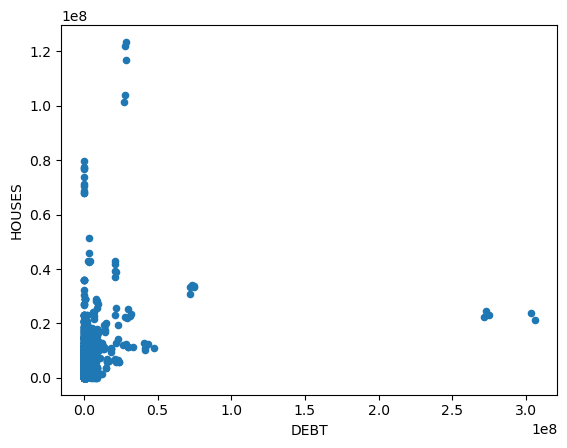

In [23]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x="DEBT",y="HOUSES");

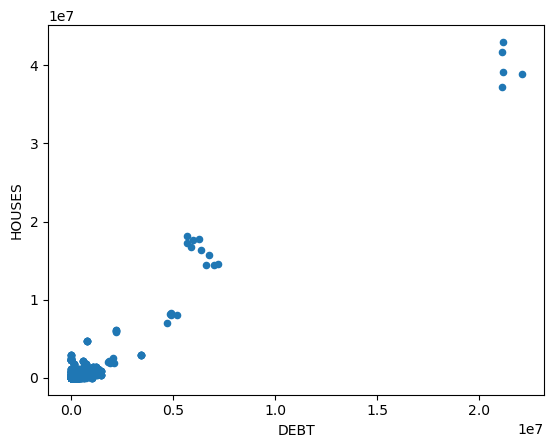

In [24]:
# Create scatter plot of HOUSES vs DEBT, df_fear

df_fear.plot.scatter(x="DEBT", y="HOUSES");

The outliers make it a little difficult to see the difference between these two plots, but the relationship is clear enough: our df_fear graph shows an almost perfect linear relationship, while our df graph shows something a little more muddled. You might also notice that the datapoints on the df_fear graph form several little groups.